In [61]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

**Решить задачу Коши методом Адамса 4 порядка**
$$2x^{2} y^{'} - 2y^2 - 3xy + 2x = 0, 1 \le x \le 2$$
Начальные условия: $y(1) = 0.5$ 

С погрешностью: $\varepsilon = 0.0001$


In [62]:
def f(x, y):
    '''
    функция правой части, где в левой стоит производная y по x
    '''
    return y**2 / x**2 + 1.5 * y / x - x**-1

def analytical_solve(x):
    '''
    аналитическое решение
    '''
    return np.sqrt(x) - x / 2

In [63]:
def find_step(delta, epsilon=0.0001):
    '''
    находим шаг вычислений
    '''
    i = 1
    while  (delta / i)**4 - epsilon > 0.0:
        i += 1
    return i

def RK(x, y, h):
    '''
    Метод Рунге-Кутта
    '''

    for i in range(len(x) - 1):
        k1 = f(x[i], y[i]) * h
        k2 = f(x[i] + h / 2, y[i] + k1 / 2) * h
        k3 = f(x[i] + h / 2, y[i] + k2 / 2) * h
        k4 = f(x[i] + h, y[i] + k3) * h
        y[i + 1] += y[i] - (k1 + 2 * k2 + 2 * k3 + k4)/ 6
        
    return y 

def adams(x, y, h, n):
    '''
    Метод Адамса
    '''
    qn = np.zeros(n)
    qn[:4] += h * f(x[:4], y[:4])
    for i in range(3, len(x) - 1):
        dq = np.diff(qn)
        ddq = np.diff(dq)
        dddq = np.diff(ddq**2)
        y[i + 1] += y[i] - qn[i] + dq[i - 1] / 2 + 5 * ddq[i - 2] / 12 + 3 * dddq[i - 3] / 8
        qn[i + 1] = h * f(x[i + 1], y[i + 1])
    return y


In [64]:
#начальные условия
x = [1, 2]
y0 = 0.5
d = x[0] - x[1]

eps = 0.0001

n = find_step(d, eps)
h = d / n

xn = np.linspace(x[0], x[1], n)
yn = np.zeros(n)
yn[0] = y0

analytical = analytical_solve(xn)
RK(xn[:4], yn[:4], h)
adams(xn, yn, h, n)



array([0.5       , 0.50108353, 0.50033647, 0.49802523, 0.49422617,
       0.48926426, 0.48324864, 0.47630743, 0.46853381, 0.46001033,
       0.45080638])

In [65]:
#красивый вывод
dat = {
    'x' : xn,
    'Analytical solve' : analytical,
    'Numeric solve' : yn,
    'Error' : np.abs(analytical - yn),
    'Max error' : np.max(np.abs(analytical - yn))
}
df = pd.DataFrame(data=dat)
df.transpose()

,0,1,2,3,4,5,6,7,8,9,10
x,1.000000,1.100000,1.200000,1.300000,1.400000,1.500000,1.600000,1.700000,1.800000,1.900000,2.000000
Analytical solve,0.500000,0.498809,0.495445,0.490175,0.483216,0.474745,0.464911,0.453840,0.441641,0.428405,0.414214
Numeric solve,0.500000,0.501084,0.500336,0.498025,0.494226,0.489264,0.483249,0.476307,0.468534,0.460010,0.450806
Error,0.000000,0.002275,0.004891,0.007850,0.011010,0.014519,0.018338,0.022467,0.026893,0.031605,0.036593
Max error,0.036593,0.036593,0.036593,0.036593,0.036593,0.036593,0.036593,0.036593,0.036593,0.036593,0.036593


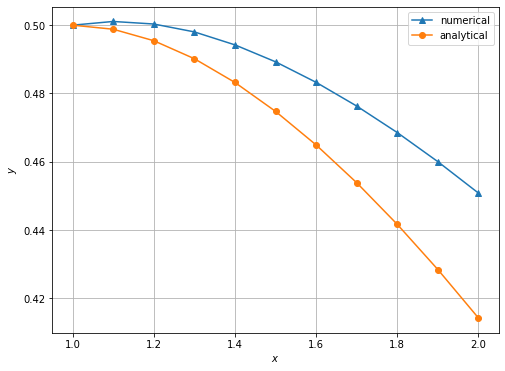

In [66]:
#графики
fig, ax = plt.subplots(figsize=(8, 6))
fig.set_facecolor('white')
        
plt.plot(xn, yn, '^-', label='numerical')
plt.plot(xn, analytical, 'o-', label='analytical')

plt.ylabel('$y$')
plt.xlabel('$x$')
plt.legend()
plt.grid(True)

    
plt.show()